
# <span style='color:green;font-size:200%'> Gráficos de COVID-19 por paises</span>
***

## <span style='color:blue;font-size:100%'> Paises selecionados:</span>
* USA        
* Brasil   
* Alemanha
* Itália   
* Russia

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from read_covid19 import read

## <span style='color:red;font-size:100%'> Atualiza do dataset</span>

In [68]:
new = True

In [69]:
if new:    
    read(url = 'https://covid-tracker-us.herokuapp.com')

---

In [70]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [71]:
dados_grupo = dados.groupby('Pais')

In [72]:
dados_grupo.get_group('Brasil').tail(n=10)

,Data,Casos,Mortes,Pais,Dias,Casos_Media,Mortes_Media,Taxa_Casos_Media,Taxa_Mortes_Media,Taxa_Casos,Taxa_Mortes,Porcentagem,Porcentagem_Media
513,18/11/2020,5945849,167455,Brasil,246,5.862622e+06,165806.000000,28597.857143,540.000000,35918.0,606.0,2.82,2.82
514,19/11/2020,5981767,168061,Brasil,247,5.891220e+06,166346.000000,29930.285714,553.714286,38397.0,552.0,2.81,2.81
515,20/11/2020,6020164,168613,Brasil,248,5.921151e+06,166899.714286,29118.142857,475.857143,32622.0,376.0,2.80,2.80
516,21/11/2020,6052786,168989,Brasil,249,5.950269e+06,167375.571429,29758.285714,483.571429,18615.0,194.0,2.79,2.79
517,22/11/2020,6071401,169183,Brasil,250,5.980027e+06,167859.142857,30163.428571,495.857143,16207.0,302.0,2.79,2.79
518,23/11/2020,6087608,169485,Brasil,251,6.010190e+06,168355.000000,29564.285714,488.000000,31100.0,630.0,2.78,2.78
519,24/11/2020,6118708,170115,Brasil,252,6.039755e+06,168843.000000,31536.714286,473.428571,47898.0,654.0,2.78,2.78
520,25/11/2020,6166606,170769,Brasil,253,6.071291e+06,169316.428571,31779.000000,485.571429,37614.0,691.0,2.77,2.77
521,26/11/2020,6204220,171460,Brasil,254,6.103070e+06,169802.000000,31169.428571,480.142857,34130.0,514.0,2.76,2.76
522,27/11/2020,6238350,171974,Brasil,255,6.134240e+06,170282.142857,NaN,NaN,NaN,NaN,2.76,2.76


In [73]:
#paises = ['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]
#paises = ['USA', 'Brasil', 'Alemanha', 'Itália', 'Russia' ]
#paises_sem = ['Brasil', 'Russia', 'Itália', 'USA']
paises = ['USA', 'Brasil', 'India', 'Itália']
paises_sem = ['Brasil', 'USA', 'India', 'Itália']
# cores
cor = { 'Brasil'   :      'black',
         'USA'     :       'blue',
         'Itália'  :          'm',
         'Espanha' :        'red',
         'Russia'  : 'darkorange',
         'Alemanha':      'green',
         'India'   :      'green'}
# transparencia

alpha ={ 'Brasil'   :     1.0,
         'USA'     :      0.6,
         'Itália'  :      0.6,
         'Espanha' :      0.6,
         'Russia'  :      0.6,
         'Alemanha':      0.6,
         'India'   :      0.6}

#
mar = { 'Brasil'   :     None,
         'USA'     :      'o',
         'Itália'  :      '^',
         'Espanha' :      'x',
         'Russia'  :      's',
         'Alemanha':      'p',
         'India'   :      'p'}

#
lw = { 'Brasil'   :     3,
        'USA'     :     1,
        'Itália'  :     1,
        'Espanha' :     1,
        'Russia'  :     1,
        'Alemanha':     1,
        'India'   :     1}

# divisao do eixo x
#x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico em logY dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Casos Totais Confirmados'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Casos'>

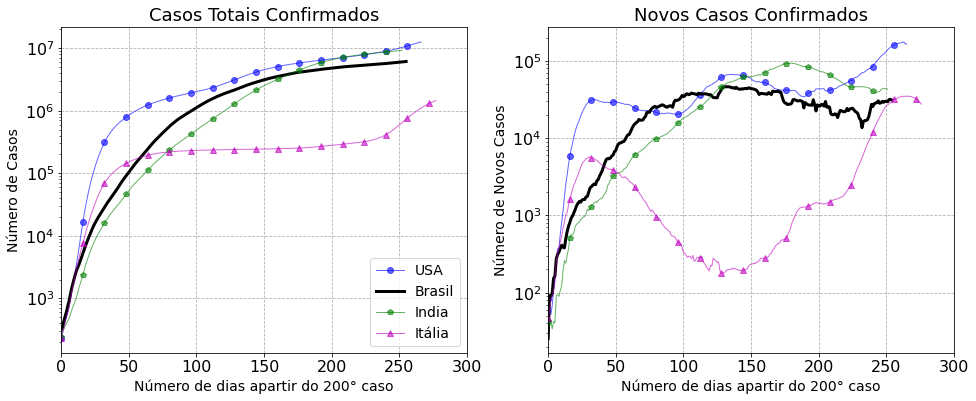

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)

    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 300)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 300)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [75]:
fig.savefig('fig/casos.png', dpi = 300)

FileNotFoundError: [Errno 2] No such file or directory: 'fig/casos.png'

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)

    ax2.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(14)

ax1.set_xlim(0, 300)
ax1.set_ylim(0, 15000000)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)
    
ax2.set_xlim(0, 300)
ax2.set_ylim(0, 200000)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico logY de mortes confirmadas</span>
---

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Mortes_Media'].get_group(name), 
                 label  = name, 
                 ls     = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
    
    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Mortes_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 300)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax1.set_ylabel('Número de Mortes', fontsize = 18)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 300)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 18)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [ ]:
fig.savefig('fig/mortes.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)
    
    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Taxa_Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)

#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 300)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Mortes', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 300)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 14)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

---
---
##  <span style='color:green;font-size:150%'> Plotando Porcentagem de Mortes </span>
-----

### $n_{casos} \rightarrow $  número total de casos confirmadas
### $n_{mortes}\rightarrow $  número total de mortes confirmadas

### $p = \frac{n_{mortes}}{n_{casos}} \times 100\rightarrow $ Porcentual de mortes


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, name in enumerate(paises):
    ax.plot(dados_grupo.get_group(name).Dias,
            dados_grupo['Porcentagem_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 300)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax.set_ylabel('%', fontsize = 14)
ax.legend(loc = 'upper right', fontsize = 14)
ax.set_title('Porcentagem de Mortes', fontsize = 18)
ax.grid(ls = '--')

ax

In [ ]:
fig.savefig('fig/porcentagem_de_mortos.png', dpi = 300)

---
---